# **1-Motivation**
As we already know that the chances of survival decrease significantly for patients who are diagnosed with lung cancer at a later stage. And since our health authorities are unable to provide accurate diagnosis at early stages of  lung cancer, also due to Covid19 there an all-time shortage of health workers due to which not all cancer patients could be diagnosed timely. 

Therefore, were trying to design an Artificial Neural Network model that has the capability to give diagnosis if the patient has lung cancer or not, and our model will also classify what type of Non-small cell lung cancer (NSCLC) cancer our patience is diagnosed from.

Chest CT scans are done to detect abnormalities and because chest CT can also detect smallest nodules formed inside the lungs. Chest CT is very efficient for diagnosing lung cancer at the very early stage. 
Here were going to use Chest CT-scan image dataset of patients gathered from all around the world. This dataset is available at Kaggle repository:
Dataset: Chest CT Scan Images

Link: https://www.kaggle.com/mohamedhanyyy/chest-ctscan-images

# **2- Methodology**
***2.1- Research Data***

The chest CT Scan images dataset consists of 1000 CT scan images of chest. And there are four different classes including the normal defined in this dataset. A brief description of each of these classes is shown in Table 1.

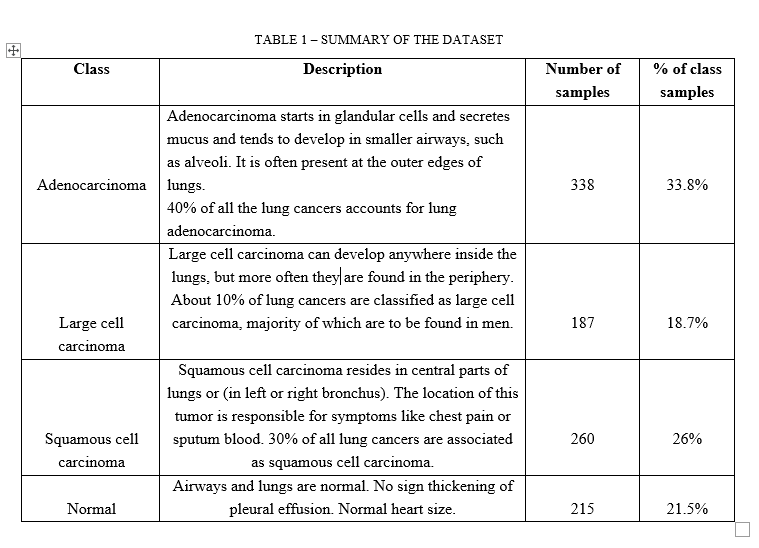

***2.2- Data Preprocessing***

Figure 2 shows each of the class sample images from the dataset. The datasets that were dealing with here is split into three different sets:

1-	Training (70%)

2-	Testing (20%)

3-	Validation (10%)

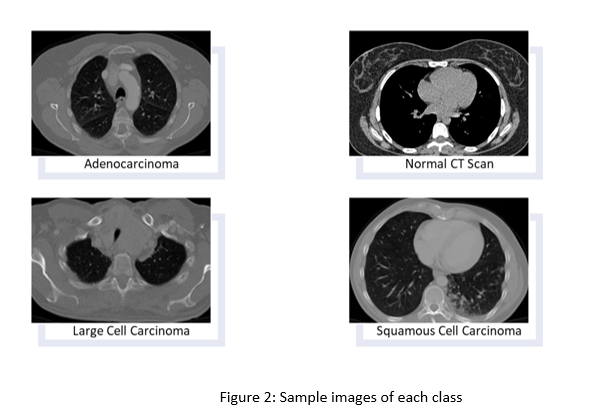

Before building our neural network model we had to perform some preprocessing on our given dataset. The size of images in the initial dataset was varying therefore we converted and reduced size to 500x500 pixels to optimize our data processing. 

#**3-	Convolution Neural Network (CNN)**

Here in this project, we will be using convolution neural network CNN to perform classification task where our CNN will classify all 4 classes. After that we will perform prediction tasks to predict if the patient has lung cancer or not.

The reasons why we are using CNN over other NN are,

1-	 First, CNN was specially developed for dealing with image processing and over the years it has proven to be very efficient with image classification.

2-	The number of layers inside a neural network rapidly increases the number of parameters were dealing with, and therefore it makes our model training computationally heavy. Whereas tunning time for these parameters is significantly reduced in CNN.

3-	 Main advantage of using CNN is that all the important and desired features are automatically captured without any human intervention.

#**4-	Experimental Results**

In our CNN model we focused primarily on the following parameters:

1-	Convolution layers

2-	Pooling strategies

3-	Batch size

4-	Number of epochs

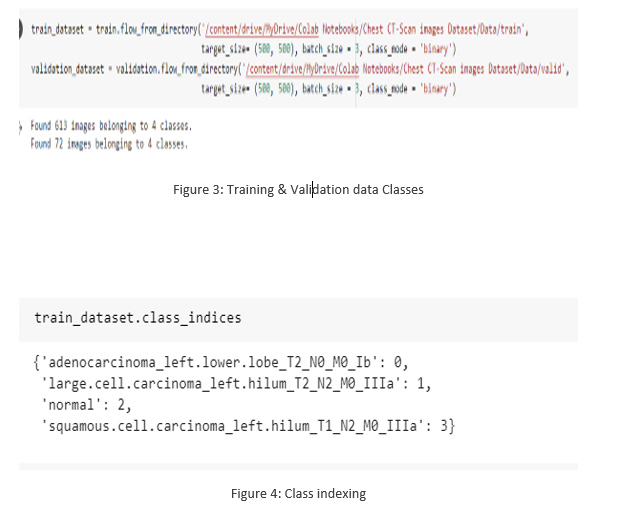

#**5- Conclusion**

To conclude we successfully build a CNN model for predicting if the patient has cancer or not. And we also notice that we reached a maximum accuracy of 46% for our model. This accuracy can further be improved by tunning the number of epochs, batch size and other parameters.








In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
!pip install -q keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [20]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Chest CT-Scan images Dataset/Data/train', 
                                          target_size= (500, 500), batch_size = 3, class_mode = 'binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Chest CT-Scan images Dataset/Data/valid', 
                                          target_size= (500, 500), batch_size = 3, class_mode = 'binary')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [21]:
train_dataset.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [22]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape = (500, 500, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation= 'sigmoid')
                                    ])

In [24]:
#model.compile(optimizer = 'rmsprop',
 #             loss = 'binary_crossentropy', 
  #            metrics= ['accuracy'])

In [25]:
model.compile(loss='binary_crossentropy', optimizer= RMSprop(learning_rate=0.001), metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',
#               optimizer="adam",
#                metrics=['accuracy'])


In [26]:
model_fit = model.fit(
    x=train_dataset, batch_size=5, 
    epochs=30, validation_data=validation_dataset, 
    steps_per_epoch=5)

Epoch 1/30
5/5 [==============================] - 5s 831ms/step - loss: 18.5466 - accuracy: 0.2000 - val_loss: -0.5782 - val_accuracy: 0.2917
Epoch 2/30
5/5 [==============================] - 3s 665ms/step - loss: -4.1758 - accuracy: 0.1333 - val_loss: -13.7522 - val_accuracy: 0.2917
Epoch 3/30
5/5 [==============================] - 3s 522ms/step - loss: 13.9125 - accuracy: 0.2000 - val_loss: -14.3253 - val_accuracy: 0.2917
Epoch 4/30
5/5 [==============================] - 2s 449ms/step - loss: -143.4242 - accuracy: 0.1333 - val_loss: -341.9733 - val_accuracy: 0.2917
Epoch 5/30
5/5 [==============================] - 2s 458ms/step - loss: -1482.6268 - accuracy: 0.2000 - val_loss: -3174.5278 - val_accuracy: 0.2917
Epoch 6/30
5/5 [==============================] - 2s 565ms/step - loss: -29033.9121 - accuracy: 0.0667 - val_loss: -28079.6973 - val_accuracy: 0.2917
Epoch 7/30
5/5 [==============================] - 3s 500ms/step - loss: -177132.6406 - accuracy: 0.1333 - val_loss: -137108.9531

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 498, 498, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 249, 249, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 60, 60, 64)      

In [28]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/All test'

for j in os.listdir(dir_path):
  #print(j)
   img = image.load_img(dir_path+'//'+j, target_size=(500, 500))
   plt.imshow(img)
   plt.show()
  
   X = image.img_to_array(img)
   X = np.expand_dims(X, axis=0)
   images = np.vstack([X])
   val = model.predict(images)

   if val == 0:
     print("Cancer Detetected : Adenocarcinoma")
   elif val == 1:
     print("Cancer Detetected : Large Cell Carcinoma")
   elif val == 2:
     print("No Cancer Detetected : Normal")
   elif val == 3:
     print("Cancer Detetected : Squamous Cell Carcinoma")
  

Output hidden; open in https://colab.research.google.com to view.